In [5]:
import pandas as pd

In [11]:
import os
print(os.getcwd())

/Users/tobiasmadsen/Documents/Education/MSc/CBS/Data Management & Visualization/DMV_Exam/DMV_Exam_Code/testing_misc_scrap


In [14]:
df_calendar = pd.read_csv('/Users/tobiasmadsen/Documents/Education/MSc/CBS/Data Management & Visualization/DMV_Exam/DMV_Exam_Code/cleaned_data/cleaned_calendar.csv')

In [15]:

# Group by date and calculate Occupancy Rate
aggregated_df = df_calendar.groupby('date').apply(
    lambda x: pd.Series({
        'total_listings': len(x),
        'unavailable_listings': len(x[x['available'] == 'f']),
        'occupancy_rate': len(x[x['available'] == 'f']) / len(x) * 100
    })
).reset_index()

In [ ]:
aggregated_df.head()

In [18]:
# Filter the dataframe for the specified listing IDs
filtered_df_calendar = df_calendar[df_calendar['listing_id'].isin([31094, 32379, 38499])]

# Display the filtered dataframe
filtered_df_calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,available_numeric
0,31094,2024-06-30,f,2299.0,3,10,0
1,31094,2024-07-01,f,2299.0,3,10,0
2,31094,2024-07-02,f,2299.0,3,10,0
3,31094,2024-07-03,f,2299.0,3,10,0
4,31094,2024-07-04,f,2299.0,3,10,0


In [ ]:
# Check the unique values in the 'available' column
print(filtered_df_calendar['available'].unique())

# Step 1: Add a New Column to Flag Unavailable Listings
# Create a new column to test if the value in 'available' is 'f'
filtered_df_calendar['is_unavailable'] = filtered_df_calendar['available'].apply(lambda x: 1 if x == 'f' else 0)

# Step 2: Group by Date and Calculate Unavailable Listings
grouped_test = filtered_df_calendar.groupby('date').agg(
    total_listings=('listing_id', 'count'),
    unavailable_listings=('is_unavailable', 'sum')
).reset_index()

# Step 3: Calculate Occupancy Rate
grouped_test['occupancy_rate'] = (grouped_test['unavailable_listings'] / grouped_test['total_listings']) * 100

# Step 4: Check Results
grouped_test.head()

['f' 't']


/var/folders/fr/07l5bjl170337q1068my2hlw0000gn/T/ipykernel_41852/2401732473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_calendar['is_unavailable'] = filtered_df_calendar['available'].apply(lambda x: 1 if x == 'f' else 0)


,date,total_listings,unavailable_listings,occupancy_rate
0,2024-06-30,3,3,100.0
1,2024-07-01,3,3,100.0
2,2024-07-02,3,3,100.0
3,2024-07-03,3,3,100.0
4,2024-07-04,3,3,100.0


/var/folders/fr/07l5bjl170337q1068my2hlw0000gn/T/ipykernel_41852/954043450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_calendar['available'] = filtered_df_calendar['available'].str.lower()  # Ensure consistent case
/var/folders/fr/07l5bjl170337q1068my2hlw0000gn/T/ipykernel_41852/954043450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_calendar['date'] = pd.to_datetime(filtered_df_calendar['date'])


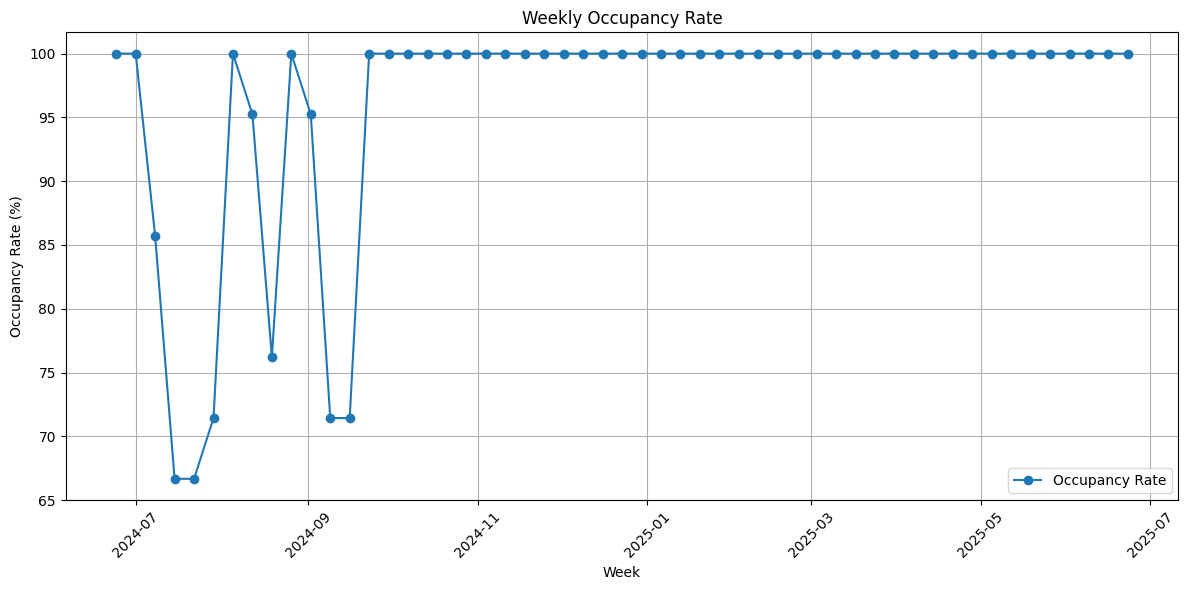

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Process the Data
# Ensure the 'available' column is interpreted correctly
filtered_df_calendar['available'] = filtered_df_calendar['available'].str.lower()  # Ensure consistent case

# Convert 'date' column to datetime type if it's not already
filtered_df_calendar['date'] = pd.to_datetime(filtered_df_calendar['date'])

# Group by week and calculate total listings, unavailable listings, and occupancy rate
grouped = filtered_df_calendar.groupby(filtered_df_calendar['date'].dt.to_period('W')).agg(
    total_listings=('listing_id', 'count'),
    unavailable_listings=('available', lambda x: (x == 'f').sum())
).reset_index()

# Convert 'date' back to datetime for plotting purposes
grouped['date'] = grouped['date'].dt.start_time

# Calculate the Occupancy Rate
grouped['occupancy_rate'] = (grouped['unavailable_listings'] / grouped['total_listings']) * 100

# Step 3: Plot the Data
plt.figure(figsize=(12, 6))
plt.plot(grouped['date'], grouped['occupancy_rate'], marker='o', linestyle='-', label='Occupancy Rate')

# Customize the plot
plt.title('Weekly Occupancy Rate')
plt.xlabel('Week')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7631731 entries, 0 to 7631730
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   listing_id         int64         
 1   date               datetime64[ns]
 2   available          object        
 3   price              float64       
 4   minimum_nights     int64         
 5   maximum_nights     int64         
 6   available_numeric  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 407.6+ MB


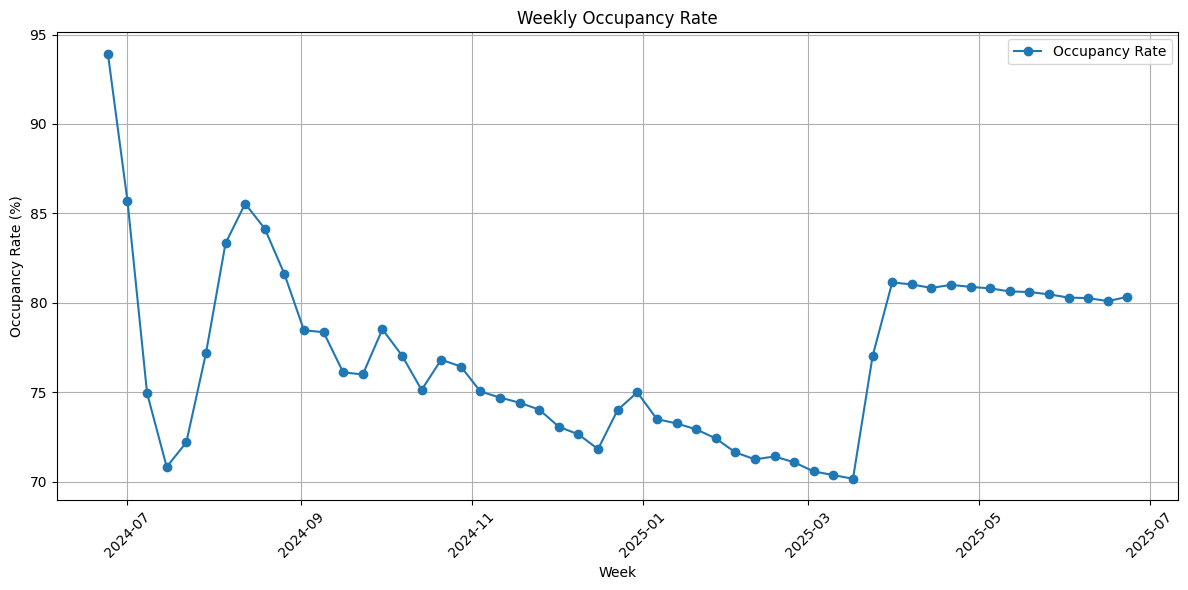

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Process the Data
# Ensure the 'available' column is interpreted correctly
df_calendar['available'] = df_calendar['available'].str.lower()  # Ensure consistent case

# Convert 'date' column to datetime type if it's not already
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Group by week and calculate total listings, unavailable listings, and occupancy rate
grouped = df_calendar.groupby(df_calendar['date'].dt.to_period('W')).agg(
    total_listings=('listing_id', 'count'),
    unavailable_listings=('available', lambda x: (x == 'f').sum())
).reset_index()

# Convert 'date' back to datetime for plotting purposes
grouped['date'] = grouped['date'].dt.start_time

# Calculate the Occupancy Rate
grouped['occupancy_rate'] = (grouped['unavailable_listings'] / grouped['total_listings']) * 100

# Step 3: Plot the Data
plt.figure(figsize=(12, 6))
plt.plot(grouped['date'], grouped['occupancy_rate'], marker='o', linestyle='-', label='Occupancy Rate')

# Customize the plot
plt.title('Weekly Occupancy Rate')
plt.xlabel('Week')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()